## IN THIS NOTEBOOK ARE IMPLEMENTED THE FOLLOWING STEPS:
- Save the dataframes (df1,df2,df3,df4,df5) into csv files
- Removing BOT based on 'generator' value (in df1)
- Save the df1 without bot in a csv file
- Load the df2 filtered (done by Giacomo)
- Remove from df2 the rows corresponding to the BOT twitters
- Perform KMeans clustering on the 'userBio' of df2 to understand if a user is a professionist or a common man
- Label the data of df2 according to the clustering results
- Create 2 new dataframes and save them as csv file
- Do 2 wordsclouds for the report showing the words of the clusters, one for the common man and one for the professionist
- Save as png the wordclouds obtained

# Importing libraries & data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pyarrow.parquet as pq
import pandas as pd
from pathlib import Path

In [ ]:
#save the dataframes in csv files
df1.to_csv('df1.csv')
df2.to_csv('df2.csv')
df3.to_csv('df3.csv')
df4.to_csv('df4.csv')
df5.to_csv('df5.csv')

# Data Exploration

Here a quick description of each dataframe:
* `df1`.

    Contains the body of the tweet and many other info. Note that many of the tweets are not complete and they have a maximum of $140$ words (e.g. `df1.iloc[1135]`), I think this is the case only when it's a retweet. While other are longer such as `df.iloc[123]` with $226$ words.
    Moreover note that many tweets are just retweets so we may want to filter them.
  <br>
    Themes for now fall under: **politics** (with political debate, observations and so on), **criptocurrencies**, **gas prices**, **sport**
  <br>



* `df2`.
    This dataframe contains the username, the user location (however more precise info about this feature can be found in `df3`), the user friends, user followers, use number of tweets, if he (or she) is verified, the bio, the user object type (however this is always `person` in the whole dataframe), the posted time and many other different info but all related to retweets (body, id, location and so on)

<br>

* `df3`.
    This dataframe contains different informations regarding the user's location, in particular the state and the city where they are from, there is also the county but not always in many cases this is not specified.

    <br>
* `df4`. Hashtags
    This dataframe just contains the hashtags in the tweets however be careful since if a tweet does not contain a hashtag then it won't be in this dataframe, this implied that while `df1`, `df2` and `df3` are "synchronized" in the sense that row $34$ will correspond to the same user in all three dataframes, this is not true anymore in the case of `df4`. Only the `id` is still the same.
  <br>
* `df5`.
    This contains user mentions in a tweet, that is in the body of the tweet there is something like `@user123`, it may be a reference, it may be a replay or a retweet.

**da fare:**
* Fai data exploration (e.g. mappa degli stati uniti)!
* Filtrare sulla base della bio tra esperti e non esperti, rimuovere i bot
* Topic analysis, filtrare i tweet che ci interessano a livello economico (e.g. wordcloud, LDA, BERT)


In [ ]:
# generator = df1['generator'].unique()
# for i in generator:
#     print(i)

# REMOVING BOT BASED ON 'generator' value

In [ ]:
no_bot = ['Twitter Lite',
'LinkedIn',
'Facebook',
'Twitter Web Client',
'Twitter for iPhone',
'Twitter for Android',
'Buffer',
'Twitter for iPad',
'SocialFlow',
'TweetDeck',
'Twitterrific for iOS',
'EconomicPoetry',
'Instagram',
'Google',
'WordPress.com',
'Twitter for Mac',
'Tumblr',
'Tweet Button',
'iOS',
'Adobe® Social',
'OS X',
'Twitter for Android',
'Twittascope',
'Twitter for Windows Phone',
'Twitter for Advertisers']

In [ ]:
#removing the rows with the generator values not in the list (since they are bot sites)
df1_noBot = df1[df1['generator'].isin(no_bot)]
df1_noBot.to_csv('df1_NoBot.csv') #save the result in a csv file
print('rows deleted: ',len(df1) - len(df1_noBot))

rows deleted:  497478


In [4]:
df1_noBot = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/df1_NoBot.csv')

#### FILTER THE DF2 BASED ON THE ID OF THE NEW DF1 (df1_NoBot)

In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/filtered_df2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,26,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df2_noBot = df2[df2['id'].isin(df1_noBot['id'])] #WE SHOULD DO THIS FOR ALL THE DF (3,4,5,6)

In [7]:
df2_noBot.to_csv('/content/drive/MyDrive/Colab Notebooks/df2_NoBot.csv') #save the result in a csv file

### TAKE ONLY THE TWITTER WITH THE USER BIO

In [8]:
df2_Bio = df2_noBot['userBio'].notnull()

## FILTER THE TWITTER ACCORDING TO THE USER BIO, DIVIDING THEM IN PROFESSIONALS AND 'MAN OF THE STREET'

In [9]:
new_df2 = df2_noBot[df2_Bio]

## TEXT CLUSTERING USING KMEANS ON 'userBio' IN ORDER TO IDENTIFY THE TOPICS AND CLASSIFY THE USERS

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import time

In [12]:
documents = new_df2['userBio'].values.astype("U")
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

In [ ]:
# # Silhouette
# clusters = []
# sil_scores = []
# for k in range(2,7,1):#tqdm(range(2,7,1)):    
#     # Run the kmeans algorithm
#     kmeans = KMeans(n_clusters=k,init='k-means++', max_iter=1000,random_state = 57).fit(features)
#     label = kmeans.labels_
#     sil_ = silhouette_score(features,label)
#     sil_scores.append(sil_)
#     clusters.append(k)

# #save the max silhouette score, which is the best
# best_score = max(sil_scores)
# #save the index of the max silhouette score that indicates the opt k
# best_k = sil_scores.index(best_score)
# print(sil_scores)
# print(best_k,best_score)

In [ ]:
#CLUSTERING
k = 7 #best_k
model = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=1,random_state=457)
model.fit(features)

new_df2['cluster'] = model.labels_

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :40]: #print out 30 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

In [41]:
#creation of the labels (0 = professionals , 1 = men of the street)
Label = {0 : 1, 1 : 1, 2 : 0 , 3 : 1, 4 : 0 , 5 : 1, 6 : 1}
new_df2['LABEL'] = new_df2['cluster'].map(Label)
new_df2.head()

del new_df2['cluster']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,id,userId,userPreferredName,userDisplayName,userLocation,userFriends,userFollowers,userNumTweets,userVerified,...,retweetUserLang,retweetUserPreferredName,retweetUserVerified,retweetUserFollowersCount,retweetUserFriendsCount,retweetUserFavouritesCount,retweetUserPostedTime,postedtime,LABEL,cluster
1,2,"tag:search.twitter.com,2005:1000138945731031040",id:twitter.com:223565922,SoPhillyFred,SoPhilly Fred 🇺🇸🏇,Pacific Northwest,441,691,60587,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-25,0,4
2,3,"tag:search.twitter.com,2005:1000149645920735232",id:twitter.com:1252224511,EnergyPhilFlynn,Phil Flynn,"Chicago, IL",1687,4319,7963,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-25,0,4
3,6,"tag:search.twitter.com,2005:1000562796646428673",id:twitter.com:992334290,JeanSwenson2,Jean Suzanne Swenson,"Seattle, WA",2423,1248,9281,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-27,0,4
4,9,"tag:search.twitter.com,2005:1001436242440085504",id:twitter.com:21130921,WFAE,WFAE,"Charlotte, NC",793,15827,23514,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-29,0,4
5,12,"tag:search.twitter.com,2005:1001519331774169088",id:twitter.com:999277075323408385,PrinREInvesting,Jeff Fulmer,"Franklin, TN",91,10,16,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-29,0,4


In [46]:
# count occurrences of 0 and 1
new_df2['LABEL'].value_counts(dropna=False)

0    489261
1    195965
Name: LABEL, dtype: int64

**CREATE 2 NEW DATAFRAMES**

In [49]:
df_professionals = new_df2[new_df2.LABEL == 0]
df_men = new_df2[new_df2.LABEL == 1]

del df_professionals['LABEL']
del df_professionals['Unnamed: 0']
df_professionals.to_csv('/content/drive/MyDrive/Colab Notebooks/df_professionals.csv')

del df_men['LABEL']
del df_men['Unnamed: 0']
df_men.to_csv('/content/drive/MyDrive/Colab Notebooks/df_men.csv')

**WORD CLOUDS**

In [50]:
from wordcloud import WordCloud

In [64]:
all_c_words = []
for i in range(k):
    words = []
    for j in order_centroids[i, :40]: #print out 30 feature terms of each cluster 
        words.append(terms[j])
    all_c_words.append(words)

In [70]:
txt = []
for i in all_c_words:
  txt.append(' '.join(w for w in i))

'ub hof 2008 eye buffalo bull greatest read supporter university world falov falpal falters falter falsus falsos falsified falsification falsely falsehoods falsehoodonly falo falsehood falsedad falseclaimsact falnation falseallegations falmouth falways falseaccusations false fals falrein falulu209 fam falwell fallx fami famfrit'

In [79]:
word_cloud_econ = WordCloud(
              width=3000,
              height=2000,
              random_state=1,
              background_color=False,
              colormap="Pastel1",
              collocations=False).generate(txt[6])

word_cloud_men = WordCloud(
              width=3000,
              height=2000,
              random_state=1,
              background_color=False,
              colormap="Pastel2",
              collocations=False).generate(txt[4])

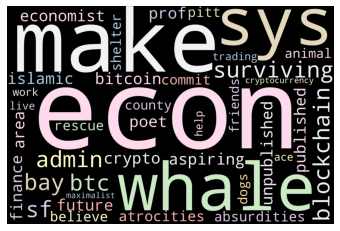

In [80]:
import matplotlib.pyplot as plt
plt.imshow(word_cloud_econ)
plt.axis("off")
plt.show()

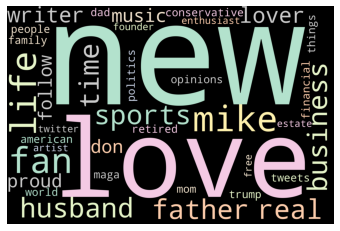

In [81]:
plt.imshow(word_cloud_men)
plt.axis("off")
plt.show()

In [83]:
word_cloud_econ.to_file('/content/drive/MyDrive/Colab Notebooks/econ_wc.png')

In [84]:
word_cloud_men.to_file('/content/drive/MyDrive/Colab Notebooks/men_wc.png')